# Analysis of Meteorological Data

Loading Data

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('C:\\Users\\91724\\Downloads\\weatherHistory.csv')

In [5]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [6]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [13]:
df.duplicated().sum()

24

In [10]:
df1 = df.duplicated(keep=False)
df2 = df[-df1]

In [11]:
df2.duplicated().sum()

0


# Resampling the data on monthly frequency

In [14]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df=df.set_index('Formatted Date')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95936 entries, 2006-03-31 22:00:00+00:00 to 2016-09-09 21:00:00+00:00
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   95936 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           95936 non-null  float64
 3   Apparent Temperature (C)  95936 non-null  float64
 4   Humidity                  95936 non-null  float64
 5   Wind Speed (km/h)         95936 non-null  float64
 6   Wind Bearing (degrees)    95936 non-null  int64  
 7   Visibility (km)           95936 non-null  float64
 8   Pressure (millibars)      95936 non-null  float64
 9   Daily Summary             95936 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 8.1+ MB


In [16]:
columns=['Apparent Temperature (C)','Humidity']
df_monthly_mean=df[columns].resample('MS').mean()

In [18]:
df_monthly_mean

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,9.825775,0.827951


### Plotting different graphs

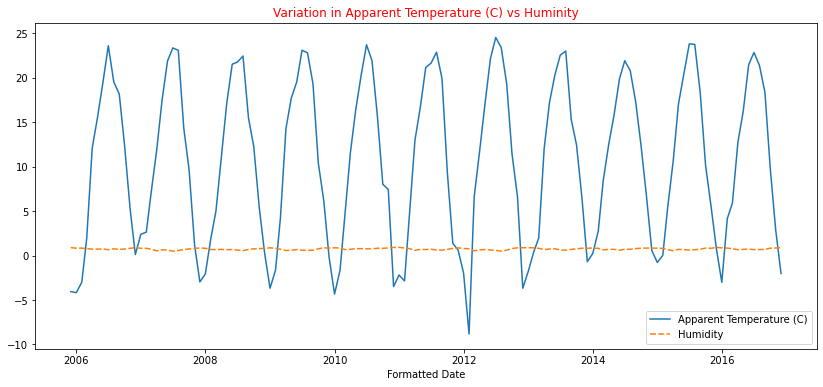

In [21]:
plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temperature (C) vs Huminity", color="r")
sns.lineplot(data=df_monthly_mean,color='red')
plt.legend(loc=4)
plt.show()



Plotting graph to find whether the average Apparent temperature for April month starting from 2006 to 2016 and the average humidity for the same period have increased or not.



In [22]:
data=df_monthly_mean[df_monthly_mean.index.month==4]
data

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-04-01 00:00:00+00:00,12.098827,0.728625
2007-04-01 00:00:00+00:00,11.894421,0.536361
2008-04-01 00:00:00+00:00,11.183688,0.693194
2009-04-01 00:00:00+00:00,14.267076,0.567847
2010-04-01 00:00:00+00:00,11.639406,0.706875
2011-04-01 00:00:00+00:00,12.978997,0.591625
2012-04-01 00:00:00+00:00,11.780703,0.643583
2013-04-01 00:00:00+00:00,12.045563,0.677667
2014-04-01 00:00:00+00:00,12.486181,0.691403


## Monthly Analysis for April


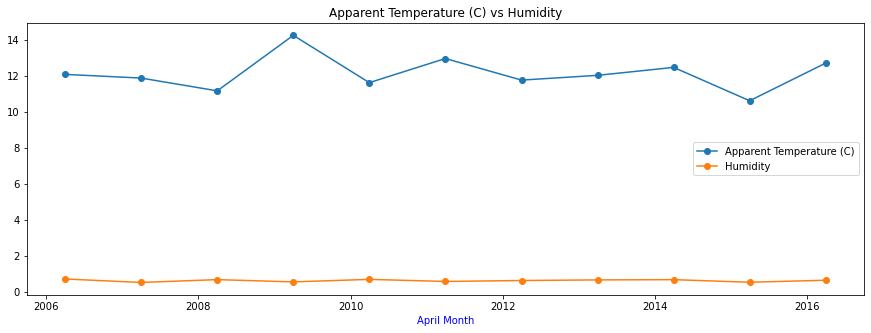

In [26]:
plt.figure(figsize=(15,5))
plt.plot(data.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'],'o-',label='Apparent Temperature (C)')
plt.plot(data.loc['2006-04-01':'2016-04-01','Humidity'],'o-',label='Humidity')
plt.title("Apparent Temperature (C) vs Humidity")
plt.xlabel('April Month',color="b")
plt.legend(loc=7)
plt.show()

Now we will plot this monthly analysis for all months over the 10 year period.

## January

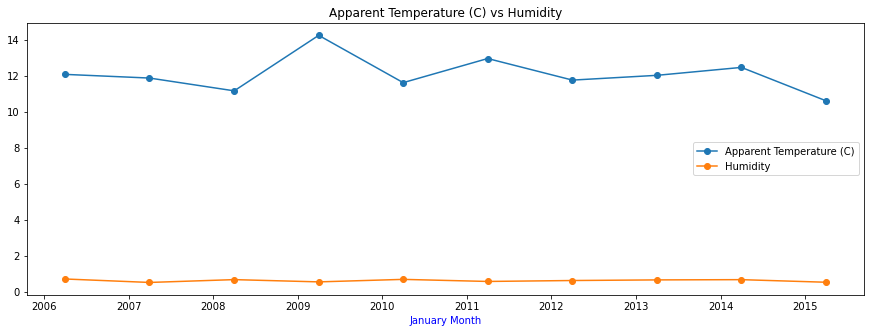

In [28]:
plt.figure(figsize=(15,5))
plt.plot(data.loc['2006-01-01':'2016-01-01','Apparent Temperature (C)'],'o-',label='Apparent Temperature (C)')
plt.plot(data.loc['2006-01-01':'2016-01-01','Humidity'],'o-',label='Humidity')
plt.title("Apparent Temperature (C) vs Humidity")
plt.xlabel('January Month',color="b")
plt.legend(loc=7)
plt.show()

## February

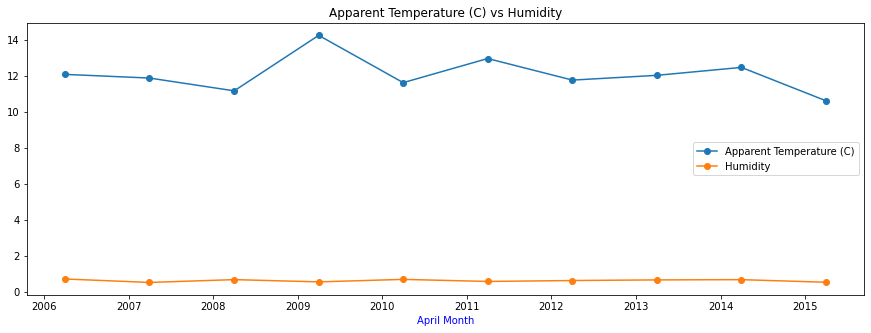

In [29]:
plt.figure(figsize=(15,5))
plt.plot(data.loc['2006-02-01':'2016-02-01','Apparent Temperature (C)'],'o-',label='Apparent Temperature (C)')
plt.plot(data.loc['2006-02-01':'2016-02-01','Humidity'],'o-',label='Humidity')
plt.title("Apparent Temperature (C) vs Humidity")
plt.xlabel('February Month',color="b")
plt.legend(loc=7)
plt.show()

## March

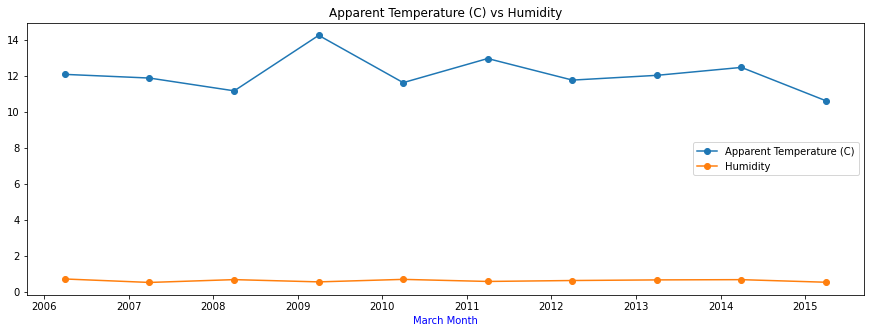

In [31]:
plt.figure(figsize=(15,5))
plt.plot(data.loc['2006-03-01':'2016-03-01','Apparent Temperature (C)'],'o-',label='Apparent Temperature (C)')
plt.plot(data.loc['2006-03-01':'2016-03-01','Humidity'],'o-',label='Humidity')
plt.title("Apparent Temperature (C) vs Humidity")
plt.xlabel('March Month',color="b")
plt.legend(loc=7)
plt.show()

## May

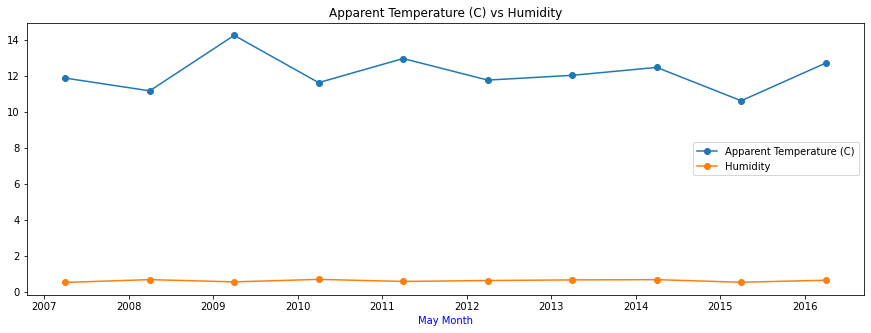

In [34]:
plt.figure(figsize=(15,5))
plt.plot(data.loc['2006-05-01':'2016-05-01','Apparent Temperature (C)'],'o-',label='Apparent Temperature (C)')
plt.plot(data.loc['2006-05-01':'2016-05-01','Humidity'],'o-',label='Humidity')
plt.title("Apparent Temperature (C) vs Humidity")
plt.xlabel('May Month',color="b")
plt.legend(loc=7)
plt.show()

## June

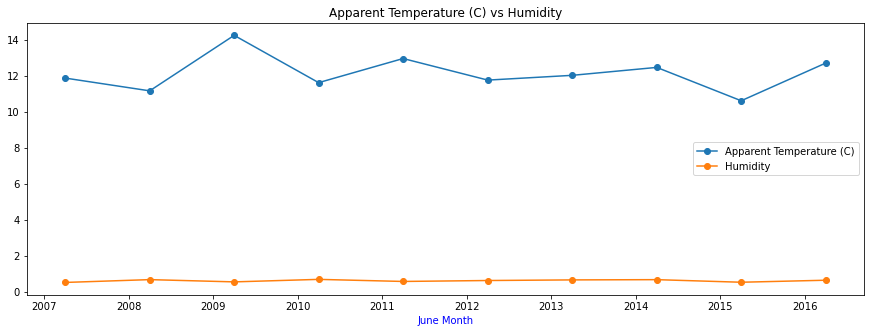

In [35]:
plt.figure(figsize=(15,5))
plt.plot(data.loc['2006-06-01':'2016-06-01','Apparent Temperature (C)'],'o-',label='Apparent Temperature (C)')
plt.plot(data.loc['2006-06-01':'2016-06-01','Humidity'],'o-',label='Humidity')
plt.title("Apparent Temperature (C) vs Humidity")
plt.xlabel('June Month',color="b")
plt.legend(loc=7)
plt.show()

## July

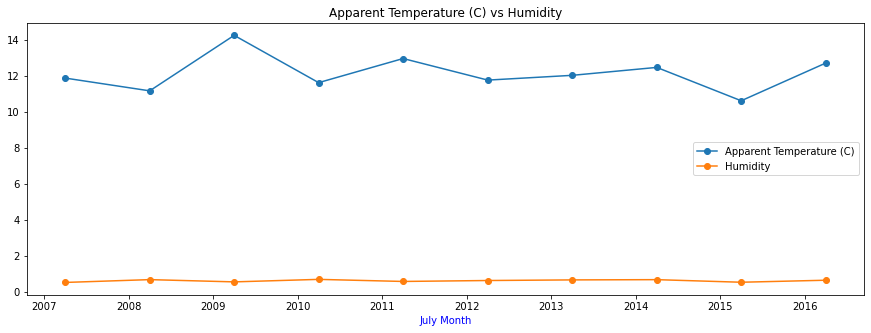

In [36]:
plt.figure(figsize=(15,5))
plt.plot(data.loc['2006-07-01':'2016-07-01','Apparent Temperature (C)'],'o-',label='Apparent Temperature (C)')
plt.plot(data.loc['2006-07-01':'2016-07-01','Humidity'],'o-',label='Humidity')
plt.title("Apparent Temperature (C) vs Humidity")
plt.xlabel('July Month',color="b")
plt.legend(loc=7)
plt.show()

## August

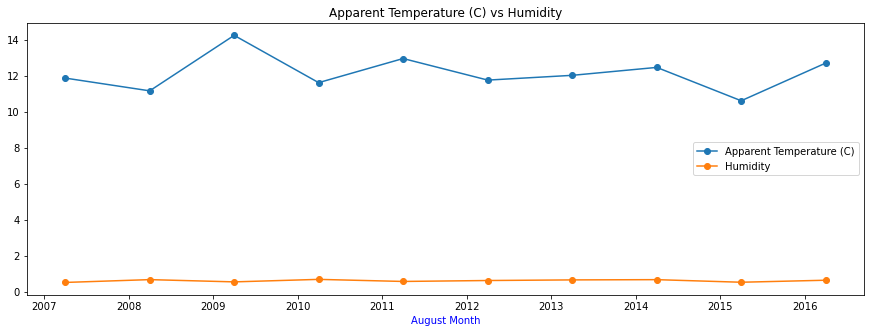

In [37]:
plt.figure(figsize=(15,5))
plt.plot(data.loc['2006-08-01':'2016-08-01','Apparent Temperature (C)'],'o-',label='Apparent Temperature (C)')
plt.plot(data.loc['2006-08-01':'2016-08-01','Humidity'],'o-',label='Humidity')
plt.title("Apparent Temperature (C) vs Humidity")
plt.xlabel('August Month',color="b")
plt.legend(loc=7)
plt.show()

## September

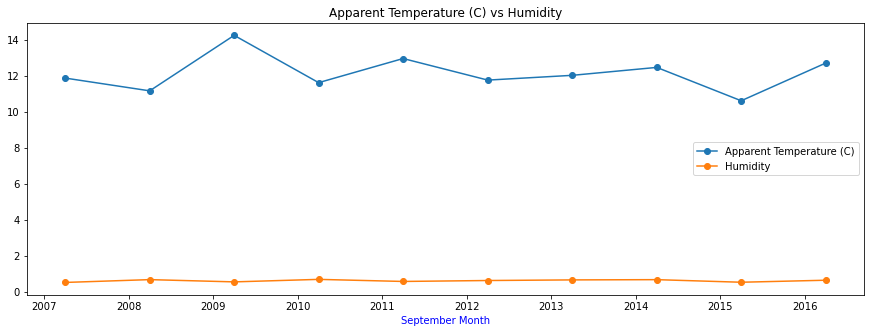

In [38]:
plt.figure(figsize=(15,5))
plt.plot(data.loc['2006-09-01':'2016-09-01','Apparent Temperature (C)'],'o-',label='Apparent Temperature (C)')
plt.plot(data.loc['2006-09-01':'2016-09-01','Humidity'],'o-',label='Humidity')
plt.title("Apparent Temperature (C) vs Humidity")
plt.xlabel('September Month',color="b")
plt.legend(loc=7)
plt.show()

## October

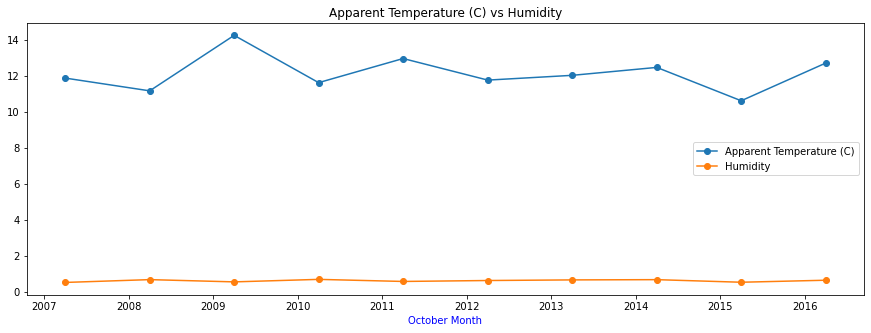

In [39]:
plt.figure(figsize=(15,5))
plt.plot(data.loc['2006-09-01':'2016-09-01','Apparent Temperature (C)'],'o-',label='Apparent Temperature (C)')
plt.plot(data.loc['2006-09-01':'2016-09-01','Humidity'],'o-',label='Humidity')
plt.title("Apparent Temperature (C) vs Humidity")
plt.xlabel('October Month',color="b")
plt.legend(loc=7)
plt.show()

## November

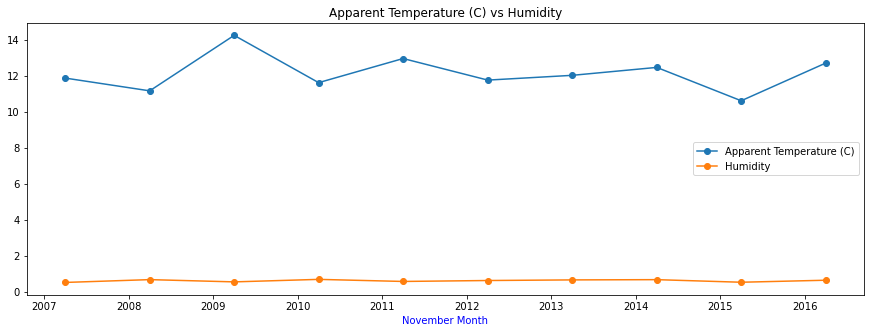

In [40]:
plt.figure(figsize=(15,5))
plt.plot(data.loc['2006-09-01':'2016-09-01','Apparent Temperature (C)'],'o-',label='Apparent Temperature (C)')
plt.plot(data.loc['2006-09-01':'2016-09-01','Humidity'],'o-',label='Humidity')
plt.title("Apparent Temperature (C) vs Humidity")
plt.xlabel('November Month',color="b")
plt.legend(loc=7)
plt.show()

## December

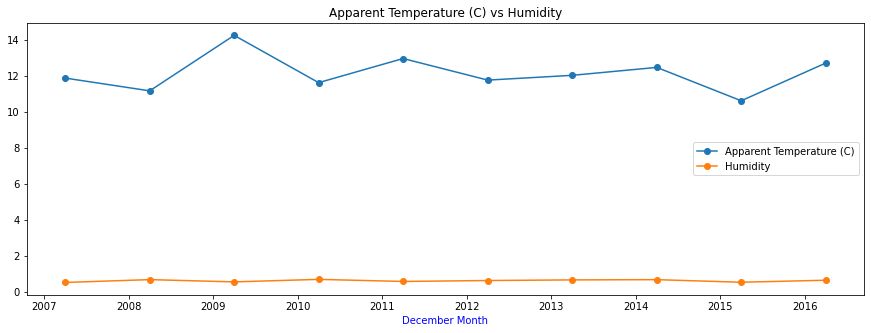

In [41]:
plt.figure(figsize=(15,5))
plt.plot(data.loc['2006-10-01':'2016-10-01','Apparent Temperature (C)'],'o-',label='Apparent Temperature (C)')
plt.plot(data.loc['2006-10-01':'2016-10-01','Humidity'],'o-',label='Humidity')
plt.title("Apparent Temperature (C) vs Humidity")
plt.xlabel('December Month',color="b")
plt.legend(loc=7)
plt.show()